# titanic으로 confusion, precision, recall 확인

In [2]:
import sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve
# from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Binarizer
import numpy as np
import pandas as pd

In [3]:
titanic = pd.read_csv('/content/drive/MyDrive/files/train.csv')
titanic = titanic.drop(labels = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket'], axis = 1)
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic['Cabin'].fillna('N', inplace=True)
titanic['Cabin'] = titanic['Cabin'].str[:1]
titanic['Embarked'].fillna('N', inplace=True)
titanic['Fare'].fillna(0, inplace=True)
titanic_incoding = pd.get_dummies(titanic)
print(titanic_incoding.head(), titanic_incoding.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   Fare        891 non-null    float64
 4   Sex_female  891 non-null    uint8  
 5   Sex_male    891 non-null    uint8  
 6   Cabin_A     891 non-null    uint8  
 7   Cabin_B     891 non-null    uint8  
 8   Cabin_C     891 non-null    uint8  
 9   Cabin_D     891 non-null    uint8  
 10  Cabin_E     891 non-null    uint8  
 11  Cabin_F     891 non-null    uint8  
 12  Cabin_G     891 non-null    uint8  
 13  Cabin_N     891 non-null    uint8  
 14  Cabin_T     891 non-null    uint8  
 15  Embarked_C  891 non-null    uint8  
 16  Embarked_N  891 non-null    uint8  
 17  Embarked_Q  891 non-null    uint8  
 18  Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(2), uint

In [4]:
def get_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  acc = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  print('오차행렬')
  print(confusion)
  print(f'정밀도 : {np.round(precision,4)}', f'재현율 : {np.round(recall,4)}', f'정확도 : {np.round(acc,4)}')
  # print(f'오차행렬 : {confusion}', '\n', np.round(precision,3), '\n', np.round(recall,3), '\n', np.round(acc,3))

In [5]:
data = titanic_incoding.drop('Survived', axis=1)
target= titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

# tree = DecisionTreeClassifier()
# tree.fit(X_train, y_train)
lor = LogisticRegression()
lor.fit(X_train, y_train)

pred = lor.predict(X_test)
get_eval(y_test, pred)

오차행렬
[[92 17]
 [23 47]]
정밀도 : 0.7344 재현율 : 0.6714 정확도 : 0.7765


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Precision


predict = 예측 값을 반환
predict_proba : 2진 분류일때 0일때 확률과 1일때 확률을 반환

In [6]:
pred_pro =  lor.predict_proba(X_test)
pred = lor.predict(X_test)
print(pred_pro.shape)
print(pred_pro[:5])
pred_pro_result = np.concatenate([pred_pro, pred.reshape(-1,1)], axis=1)        # concatenate = 2개의 결과를 붙여줌
print(pred_pro_result[:5])

(179, 2)
[[0.56335197 0.43664803]
 [0.88804599 0.11195401]
 [0.88810908 0.11189092]
 [0.0644461  0.9355539 ]
 [0.94619324 0.05380676]]
[[0.56335197 0.43664803 0.        ]
 [0.88804599 0.11195401 0.        ]
 [0.88810908 0.11189092 0.        ]
 [0.0644461  0.9355539  1.        ]
 [0.94619324 0.05380676 0.        ]]


# Binarzier 예시

In [ ]:
X = [[1, -1, 2],
     [2, 0, 0],
     [0, 1.1, 1.2]]

binarzier = Binarizer(threshold=1.1)        # 1.1보다 큰값들만 1로 표시 나머지는 0으로 표시 (threshold 설정)
print(binarzier.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


# Binarzier 활용

In [7]:
# 분류 임계값 = 0.5
custom_threshold = 0.5

pred_proba = pred_pro[:,1].reshape(-1,1)           # 앞에서 pred_pro 의 1로 나오는 값들만 새로 만들어줌

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba)
custom_predict = binarizer.transform(pred_proba)

get_eval(y_test, custom_predict)

오차행렬
[[92 17]
 [23 47]]
정밀도 : 0.7344 재현율 : 0.6714 정확도 : 0.7765


In [8]:
# 분류 임계값 = 0.4
custom_threshold_1 = 0.4
pred_proba_1 = pred_pro[:,1].reshape(-1,1)
binarizer_1 = Binarizer(threshold=custom_threshold_1).fit(pred_proba_1)
custom_predict_1 = binarizer_1.transform(pred_proba_1)

get_eval(y_test, custom_predict_1)

오차행렬
[[88 21]
 [17 53]]
정밀도 : 0.7162 재현율 : 0.7571 정확도 : 0.7877


In [15]:
# 여러개의 임계값으로 Binarizer를 이용한 예측
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_threshold(y_test, pred_proba, thresholds):
  for custom_thresholds in thresholds:
    binarizers = Binarizer(threshold=custom_thresholds).fit(pred_proba)
    custom_predicts = binarizers.transform(pred_proba)
    print('임계값 : ', custom_thresholds)
    get_eval(y_test, custom_predicts)

get_eval_threshold(y_test, pred_pro[:,1].reshape(-1,1), thresholds)

임계값 :  0.4
오차행렬
[[88 21]
 [17 53]]
accuracy : 0.7877094972067039 precision(정밀도) : 0.7162162162162162 recall(재현율) : 0.7571428571428571 f1 score : 0.736111111111111
임계값 :  0.45
오차행렬
[[89 20]
 [19 51]]
accuracy : 0.7821229050279329 precision(정밀도) : 0.7183098591549296 recall(재현율) : 0.7285714285714285 f1 score : 0.7234042553191489
임계값 :  0.5
오차행렬
[[92 17]
 [23 47]]
accuracy : 0.776536312849162 precision(정밀도) : 0.734375 recall(재현율) : 0.6714285714285714 f1 score : 0.7014925373134329
임계값 :  0.55
오차행렬
[[97 12]
 [25 45]]
accuracy : 0.7932960893854749 precision(정밀도) : 0.7894736842105263 recall(재현율) : 0.6428571428571429 f1 score : 0.7086614173228346
임계값 :  0.6
오차행렬
[[101   8]
 [ 28  42]]
accuracy : 0.7988826815642458 precision(정밀도) : 0.84 recall(재현율) : 0.6 f1 score : 0.7000000000000001


# precision_recall_curve

In [35]:
pred_proba_class = lor.predict_proba(X_test)[:,1]

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class)
print('반환된 분류 결정 임계값의 shape : ',thresholds.shape)
print('반환된 precision의 shape : ',precisions.shape)
print('반환된 recall의 shape: ',recalls.shape)

print('threshold의 sample 5개 : ', thresholds[:5])
print('precision sample 5개 : ', precisions[:5])
print('recall sample 5개 : ', recalls[:5])

thr_index = np.arange(0, thresholds.shape[0], 17)
print('샘플 추출용 index 10개 : ', thr_index)
print('샘플용 threshold : ', np.round(thresholds[thr_index],2))
print('샘플용 precision : ', np.round(precisions[thr_index], 2))
print('샘플용 recall : ', np.round(recalls[thr_index], 2))

반환된 분류 결정 임계값의 shape :  (159,)
반환된 precision의 shape :  (160,)
반환된 recall의 shape:  (160,)
threshold의 sample 5개 :  [0.07218417 0.07231025 0.07409261 0.07499863 0.07589332]
precision sample 5개 :  [0.40935673 0.40588235 0.40236686 0.39880952 0.4011976 ]
recall sample 5개 :  [1.         0.98571429 0.97142857 0.95714286 0.95714286]
샘플 추출용 index 10개 :  [  0  17  34  51  68  85 102 119 136 153]
샘플용 threshold :  [0.07 0.09 0.1  0.14 0.19 0.35 0.55 0.7  0.86 0.95]
샘플용 precision :  [0.41 0.43 0.47 0.51 0.6  0.71 0.79 0.92 0.96 1.  ]
샘플용 recall :  [1.   0.91 0.89 0.83 0.8  0.76 0.64 0.53 0.31 0.09]


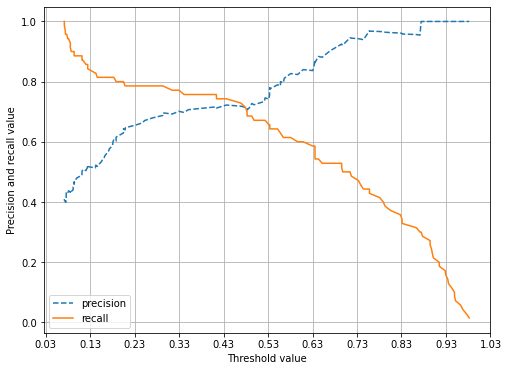

In [36]:
# 그림그리기
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test, pred_proba):
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)
  plt.figure(figsize=(8,6))
  thresholds_binary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:thresholds_binary], linestyle='--', label = 'precision')
  plt.plot(thresholds, recalls[0:thresholds_binary], label = 'recall')
  
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1), 2))

  plt.xlabel('Threshold value')
  plt.ylabel('Precision and recall value') 
  plt.legend()
  plt.grid()
  plt.show()

precision_recall_curve_plot(y_test, lor.predict_proba(X_test)[:, 1])

# F1 Score


In [10]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print(f'f1 score : {np.round(f1,4)}') 

f1 score : 0.7015


In [20]:
def get_eval(y_test, pred):
  acc = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  confusion = confusion_matrix(y_test, pred)
  f1 = f1_score(y_test, pred)
  print('오차행렬')
  print(confusion)
  print(f'accuracy : {np.round(acc,3)}  ', f'precision(정밀도) : {np.round(precision,3)}  ', f'recall(재현율) : {np.round(recall,3)}  ', f'f1 score : {np.round(f1, 3)}')
  print('\n')
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lor.predict_proba(X_test)
get_eval_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임계값 :  0.4
오차행렬
[[88 21]
 [17 53]]
accuracy : 0.788   precision(정밀도) : 0.716   recall(재현율) : 0.757   f1 score : 0.736


임계값 :  0.45
오차행렬
[[89 20]
 [19 51]]
accuracy : 0.782   precision(정밀도) : 0.718   recall(재현율) : 0.729   f1 score : 0.723


임계값 :  0.5
오차행렬
[[92 17]
 [23 47]]
accuracy : 0.777   precision(정밀도) : 0.734   recall(재현율) : 0.671   f1 score : 0.701


임계값 :  0.55
오차행렬
[[97 12]
 [25 45]]
accuracy : 0.793   precision(정밀도) : 0.789   recall(재현율) : 0.643   f1 score : 0.709


임계값 :  0.6
오차행렬
[[101   8]
 [ 28  42]]
accuracy : 0.799   precision(정밀도) : 0.84   recall(재현율) : 0.6   f1 score : 0.7




# ROC curve & AUC

In [33]:
from sklearn.metrics import roc_curve

pred_proba_class_1 = lor.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class_1)
# print(thresholds.shape)
thr_index = np.arange(0, thresholds.shape[0], 5)
print('Threshold : ', np.round(thresholds[thr_index],3))
print('FPR : ', np.round(fprs[thr_index], 3))
print('TPR : ', np.round(tprs[thr_index], 3))

Threshold :  [1.982 0.744 0.643 0.597 0.552 0.523 0.414 0.294 0.184 0.146 0.114 0.094
 0.082 0.075]
FPR :  [0.    0.018 0.046 0.083 0.11  0.147 0.193 0.22  0.339 0.486 0.541 0.661
 0.78  0.927]
TPR :  [0.    0.443 0.543 0.6   0.643 0.671 0.743 0.786 0.814 0.814 0.871 0.9
 0.943 0.957]


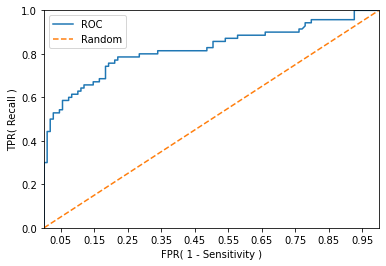

[-0.05  0.05  0.15  0.25  0.35  0.45  0.55  0.65  0.75  0.85  0.95]


In [59]:
def roc_curve_plot(y_test, pred_proba_c1):
  fprs, trps, thresholds = roc_curve(y_test, pred_proba_c1)
  plt.plot(fprs, tprs, label='ROC')
  plt.plot([0,1], [0,1], linestyle='--', label='Random')
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1),2))        # x축에서 tick을 표시할때 사용
  plt.xlim(0,1)       # x축의 범위가  0~1
  plt.ylim(0,1)       # y축의 범위가  0~1
  plt.xlabel('FPR( 1 - Sensitivity )')        # x축의 이름
  plt.ylabel('TPR( Recall )')                 # y축의 이름
  plt.legend()                    # label을 보여줌
  plt.show()
  print(np.arange(-0.05, 1.05, 0.1))

roc_curve_plot(y_test, lor.predict_proba(X_test)[:,1])

In [61]:
from sklearn.metrics import roc_auc_score
pred_proba = lor.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC & AUC score : ', roc_score)

ROC & AUC score :  0.8231323722149411


In [76]:
def get_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  acc = accuracy_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  roc_auc = roc_auc_score(y_test, pred)
  print('오차행렬')
  print(confusion)
  print('accuracy : {0:.3f}, precision : {1:.3f}, recall : {2:.3f}, f1 score : {3:.3f}, roc_auc : {4:.3f}' .format(acc, precision, recall, f1, roc_auc))
  print('\n')

thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lor.predict_proba(X_test)
get_eval_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임계값 :  0.4
오차행렬
[[88 21]
 [17 53]]
accuracy : 0.788, precision : 0.716, recall : 0.757, f1 score : 0.736, roc_auc : 0.782


임계값 :  0.45
오차행렬
[[89 20]
 [19 51]]
accuracy : 0.782, precision : 0.718, recall : 0.729, f1 score : 0.723, roc_auc : 0.773


임계값 :  0.5
오차행렬
[[92 17]
 [23 47]]
accuracy : 0.777, precision : 0.734, recall : 0.671, f1 score : 0.701, roc_auc : 0.758


임계값 :  0.55
오차행렬
[[97 12]
 [25 45]]
accuracy : 0.793, precision : 0.789, recall : 0.643, f1 score : 0.709, roc_auc : 0.766


임계값 :  0.6
오차행렬
[[101   8]
 [ 28  42]]
accuracy : 0.799, precision : 0.840, recall : 0.600, f1 score : 0.700, roc_auc : 0.763


